In [10]:
# import required modules for this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

**Datasets Overview**

In [11]:
# Load csv files
attendance = pd.read_csv('/Users/sa26/Documents/GitHub/Predict-Podcast-Listening-Time/Education-Capstone/data/2016-17_-_2020-23_Citywide_End-of-Year_Attendance_and_Chronic_Absenteeism_Data_20250604.csv')

In [12]:
demographics = pd.read_csv('/Users/sa26/Documents/GitHub/Predict-Podcast-Listening-Time/Education-Capstone/data/2019-20_Demographic_Snapshot_-_Citywide_20250604.csv')

In [13]:
graduation = pd.read_csv('/Users/sa26/Documents/GitHub/Predict-Podcast-Listening-Time/Education-Capstone/data/Graduation_results_for_Cohorts_2012_to_2019__Classes_of_2016_to_2023__20250609.csv')

**Attendance**

In [14]:
# print out the first 5 rows of data
attendance.head()

,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
0,All Grades,All Students,2018-19,30887,2278,28609,92.6,192,47,24.5
1,All Grades,All Students,2019-20,21101,1500,19601,92.9,204,58,28.4
2,All Grades,All Students,2020-21,32686,3931,28755,88.0,199,84,42.2
3,All Grades,All Students,2021-22,31663,4751,26912,85.0,190,113,59.5
4,All Grades,All Students,2022-23,32663,4159,28504,87.3,206,104,50.5


Opened attendance in data wrangler. 53,607 rows x 10 columns. 305 duplicate rows to investigate later. In the grade category, most of the data is 'All Grades'. Will probably delete Category column since it is redundant. Years are spread mostly equally through 2018 to 2023. Might want to double check % Attendance calculation. # Contributing 10+ Total Days and 1+ Pres Day means students must be enrolled for at least 10 days (regardless of whether present or absent) and must have been present for at least 1 day. Students are considered chronically absent if they have an attendance of <=90%. Might need to check out data types.

In [15]:
# Print out general information on this dataframe
attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53607 entries, 0 to 53606
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Grade                                          53607 non-null  object
 1   Category                                       53607 non-null  object
 2   Year                                           53607 non-null  object
 3   # Total Days                                   53607 non-null  int64 
 4   # Days Absent                                  53607 non-null  object
 5   # Days Present                                 53607 non-null  object
 6   % Attendance                                   53607 non-null  object
 7   # Contributing 10+ Total Days and 1+ Pres Day  53607 non-null  object
 8   # Chronically Absent                           53607 non-null  object
 9   % Chronically Absent                           53607 non-null

Will switch most of these to int64 eventually. Quote from dataset information: "In order to comply with the Family Educational Rights and Privacy Act (FERPA) regulations on public reporting of education outcomes, rows with five or fewer students are suppressed, and have been replaced with an "s". Using total days of attendance as a proxy , rows with 900 or fewer total days are suppressed. In addition, other rows have been replaced with an "s" when they could reveal, through addition or subtraction, the underlying numbers that have been redacted. Chronic absenteeism values are suppressed, regardless of total days, if the number of students who contribute  at least 20 days is five or fewer."

In [21]:
attendance.describe()

,# Total Days
count,5.360700e+04
mean,2.654513e+04
std,4.314677e+04
min,1.000000e+00
25%,8.036000e+03
50%,1.332000e+04
75%,2.304100e+04
max,1.024625e+06


Total number of days equals days present and absent. Will need to double check these calculations.

In [22]:
attendance.isnull().sum()

Grade                                            0
Category                                         0
Year                                             0
# Total Days                                     0
# Days Absent                                    0
# Days Present                                   0
% Attendance                                     0
# Contributing 10+ Total Days and 1+ Pres Day    0
# Chronically Absent                             0
% Chronically Absent                             0
dtype: int64

Text(0.5, 1.0, 'Distribution of # Total Days')

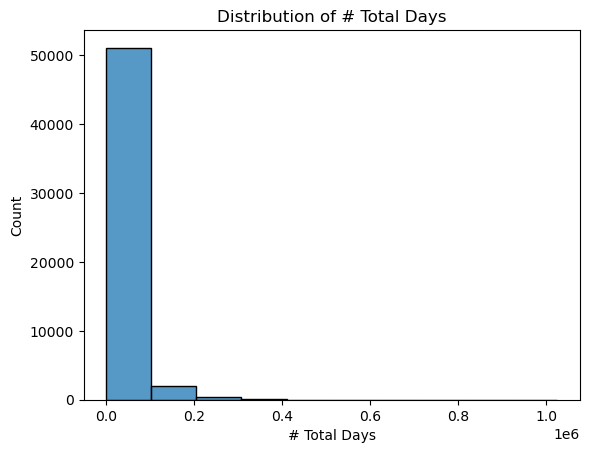

In [35]:
# Distribution of # Total Days
sns.histplot(attendance['# Total Days'], bins=10, kde=False)
plt.title('Distribution of # Total Days')

**Demographics**

In [6]:
demographics.head()

,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,...,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,2015-16,1133963,71847,84386,87804,86930,85309,81287,79581,76798,...,0.021,167465,0.148,222496,0.196,142506,0.126,801696,0.707,0.621
1,2016-17,1141232,72553,82517,86008,86279,85050,84185,80563,78985,...,0.023,169803,0.149,228347,0.200,153466,0.134,800985,0.702,0.610
2,2017-18,1135334,71528,81588,83578,83978,84363,83367,83277,79114,...,0.025,170417,0.150,231910,0.204,153661,0.135,856483,0.754,0.719
3,2018-19,1126501,73904,78627,81908,81205,81706,82510,82044,81289,...,0.027,169583,0.151,234497,0.208,148815,0.132,834003,0.740,0.713
4,2019-20,1131868,87480,78587,79171,80298,79555,80287,81513,80250,...,0.031,170370,0.151,230983,0.204,142386,0.126,821883,0.726,0.719


**Graduation**

In [7]:
graduation.head()

,Report Category,Geographic Subdivision,School Name,Category,Cohort Year,Cohort,# Total Cohort,# Grads,% Grads,# Total Regents,...,% Local of Cohort,% Local of Grads,# Still Enrolled,% Still Enrolled,# Dropout,% Dropout,# SACC (IEP Diploma),% SACC (IEP Diploma) of Cohort,# TASC (GED),% TASC (GED) of Cohort
0,Citywide,Citywide,NaN,All Students,2019,4 year August,69893,58503,83.7,58295,...,0.3,0.4,6773,9.7,3748,5.4,260,0.4,569,0.8
1,Citywide,Citywide,NaN,All Students,2018,4 year August,70912,59374,83.7,59110,...,0.4,0.4,6808,9.6,3831,5.4,322,0.5,547,0.8
2,Citywide,Citywide,NaN,All Students,2017,4 year August,72663,60055,82.6,59683,...,0.5,0.6,8225,11.3,3545,4.9,227,0.3,566,0.8
3,Citywide,Citywide,NaN,All Students,2016,4 year August,73565,58704,79.8,57734,...,1.3,1.7,9385,12.8,4338,5.9,269,0.4,852,1.2
4,Citywide,Citywide,NaN,All Students,2015,4 year August,73772,57035,77.3,51848,...,7,9.1,9979,13.5,5745,7.8,317,0.4,692,0.9
